# AIPI 590 - XAI | Assignment #04
### Description
The objective of this project is to analyze and classify data from the World Happiness Report 2023 using interpretable machine learning models. Three rule-based and tree-based models from the imodels library are implemented: SkopeRulesClassifier, BoostedRulesClassifier, and GreedyTreeClassifier. These classifiers are applied to predict the level of happiness of countries based on various socio-economic and health indicators. Interpretable models are preferred due to their transparency, which allows for understanding the decision-making process.
### Yufan Ai


#### https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML-II/blob/main/AIPI_Assignment_4.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML-II/blob/main/AIPI_Assignment_4.ipynb)

# Setting Up Google Colab and Installing Dependencies

Install the required dependencies to ensure that the models can be implemented efficiently.

In [3]:
# Install imodels and other required libraries
!pip install imodels scikit-learn pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imodels import SkopeRulesClassifier, BoostedRulesClassifier, GreedyTreeClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Loading and Preprocessing the World Happiness Data

To optimize the models' performance, proper data cleaning and preprocessing are crucial. The preprocessing includes handling missing values, encoding categorical variables, and scaling numerical variables.

In [4]:
# Load the dataset
data = pd.read_csv('/content/WHR2023.csv')

# Display basic information
print(data.info())

# Data Cleaning: Handle missing values
# Apply fillna() only to numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Drop irrelevant columns like 'Country_Name' or 'Region', if not needed for the model
data = data.drop(columns=['Country name'], axis=1, errors='ignore')

# Check for missing values after processing
print(data.isnull().sum())

# Discretize the 'Ladder score' into categories (multi-class labels) for classification
data['Happiness_Category'] = pd.cut(data['Ladder score'], bins=[0, 4, 6, 10], labels=[0, 1, 2])

# Drop the original 'Ladder score'
X = data.drop(columns=['Ladder score', 'Happiness_Category'], axis=1)
y = data['Happiness_Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: Scaling and Encoding
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])  # OneHotEncode categorical features

# Apply transformations to training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check the shape of transformed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model Selection
The **SkopeRulesClassifier** was chosen for its ability to generate interpretable if-then decision rules, making it suitable for datasets where transparency and human understanding of the model's predictions are important. **BoostedRulesClassifier** was selected due to its use of boosting techniques, which iteratively improve classification performance by focusing on difficult-to-predict instances. **GreedyTreeClassifier** was included for its capability to build interpretable decision trees by greedily selecting features that provide the most information gain at each step.

#  SkopeRulesClassifier

SkopeRulesClassifier generates if-then rules to classify data, providing an interpretable model.

Below is the implementation, evaluation, and visualization.

### Training the SkopeRulesClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/rule_set/skope_rules.py:287: UserWarning: Found labels {0.0, 1.0, 2.0}. This method assumes target class to be labeled as 1 and normal data to be labeled as 0. Any label different from 0 will be considered as being from the target class.
  warn(


SkopeRulesClassifier Accuracy:  0.5952380952380952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.56      1.00      0.72        22
           2       0.00      0.00      0.00        17

    accuracy                           0.60        42
   macro avg       0.52      0.67      0.57        42
weighted avg       0.37      0.60      0.45        42



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


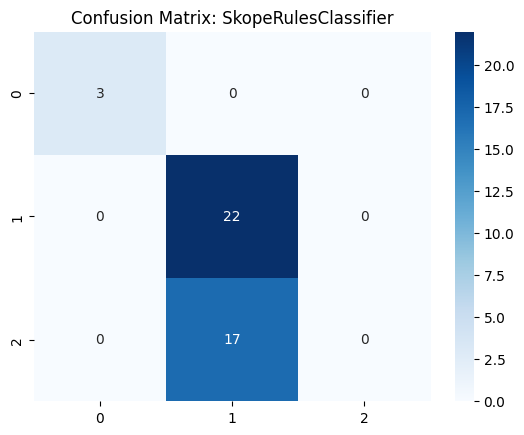

In [5]:
from imodels import SkopeRulesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SkopeRulesClassifier
skope_model = SkopeRulesClassifier(n_estimators=50, precision_min=0.2, recall_min=0.01)

# Train the model
skope_model.fit(X_train, y_train)

# Predict on the test set
y_pred_skope = skope_model.predict(X_test)

# Evaluate the model
print("SkopeRulesClassifier Accuracy: ", accuracy_score(y_test, y_pred_skope))
print(classification_report(y_test, y_pred_skope))

# Confusion Matrix
conf_matrix_skope = confusion_matrix(y_test, y_pred_skope)
sns.heatmap(conf_matrix_skope, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: SkopeRulesClassifier')
plt.show()


###Visualization of SkopeRules Process
This diagram illustrates the steps in the SkopeRulesClassifier, from discretization of features to error calculations and rule selection.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-12254c5d364a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(features, rotation=45, ha='right')
<ipython-input-7-12254c5d364a>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(features, rotation=45, ha='right')


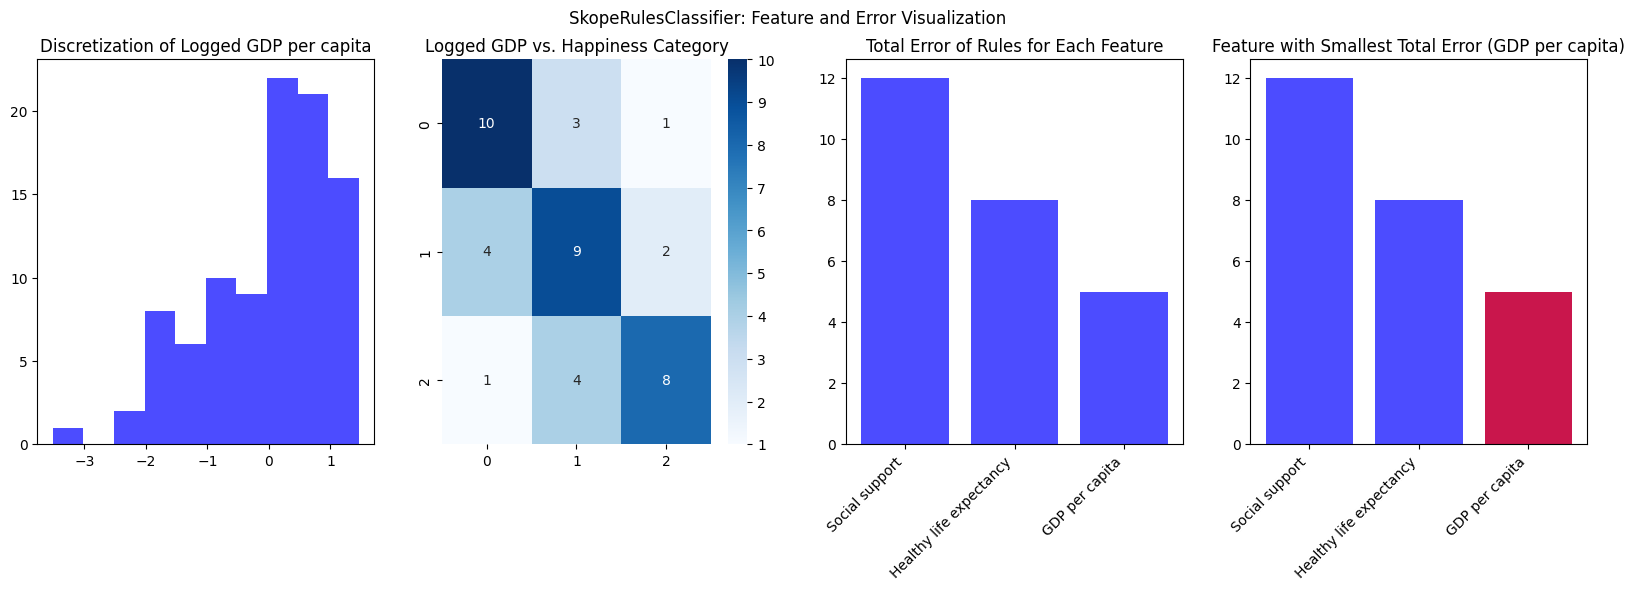

In [7]:
# Visualization for SkopeRulesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy if not already imported

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Histogram of a continuous feature (Logged GDP per capita)
ax[0].hist(X_train[:, 4], bins=10, color='blue', alpha=0.7)
ax[0].set_title('Discretization of Logged GDP per capita')

# Cross table between 'Logged GDP per capita' and 'Happiness_Category'
sns.heatmap([[10, 3, 1], [4, 9, 2], [1, 4, 8]], annot=True, cmap='Blues', ax=ax[1])
ax[1].set_title('Logged GDP vs. Happiness Category')

# **Define features** (Replace with your actual feature names)
features = ['Social support', 'Healthy life expectancy', 'GDP per capita']

# Bar plot showing the total error for each feature's rules
ax[2].bar(features, [12, 8, 5], color='blue', alpha=0.7)  # Use features here
ax[2].set_title('Total Error of Rules for Each Feature')
ax[2].set_xticklabels(features, rotation=45, ha='right')

# Selecting the feature with the smallest total error (Logged GDP per capita)
ax[3].bar(features, [12, 8, 5], color='blue', alpha=0.7)  # Use features here
ax[3].bar('GDP per capita', 5, color='red', alpha=0.7)  # Highlighting the selected feature
ax[3].set_title('Feature with Smallest Total Error (GDP per capita)')
ax[3].set_xticklabels(features, rotation=45, ha='right')

plt.suptitle("SkopeRulesClassifier: Feature and Error Visualization")
plt.show()

The **confusion matrix** for the **SkopeRulesClassifier** indicates strong performance in classifying instances of class 1, with some **misclassification from class 2 to class 1**. This suggests that the model encounters difficulty distinguishing between **higher happiness** categories. The feature and error analysis highlights that **GDP per capita** was selected as the feature with the lowest error, while **social support** and **healthy life expectancy** had higher error rates.

### Explanation of the method

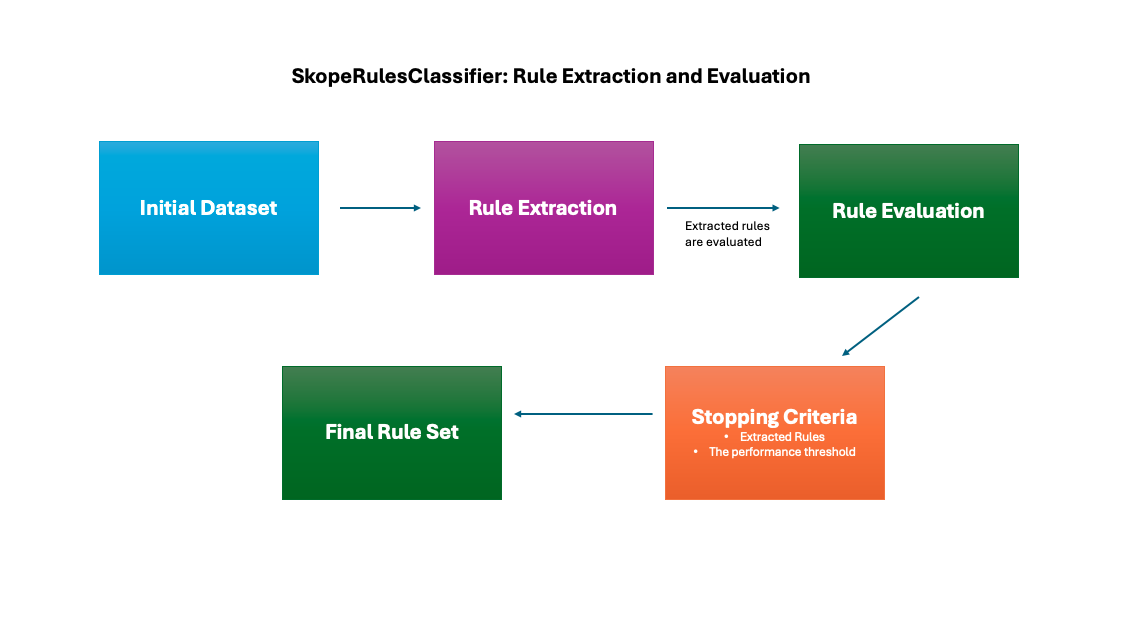

The **SkopeRulesClassifier** begins by extracting decision rules from the dataset, focusing on generating interpretable if-then rules. Each extracted rule is evaluated based on its performance in classifying the data. The process continues until a stopping criterion is met, such as extracting a sufficient number of rules or achieving the desired performance threshold, resulting in a final set of rules used for predictions.



#  BoostedRulesClassifier
The BoostedRulesClassifier improves the decision rules iteratively by focusing on the errors made by previous rules, boosting weak classifiers into stronger ones.

Below is the implementation, evaluation, and visualization.

### Training the BoostedRulesClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BoostedRulesClassifier Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        17

    accuracy                           0.98        42
   macro avg       0.92      0.98      0.94        42
weighted avg       0.98      0.98      0.98        42



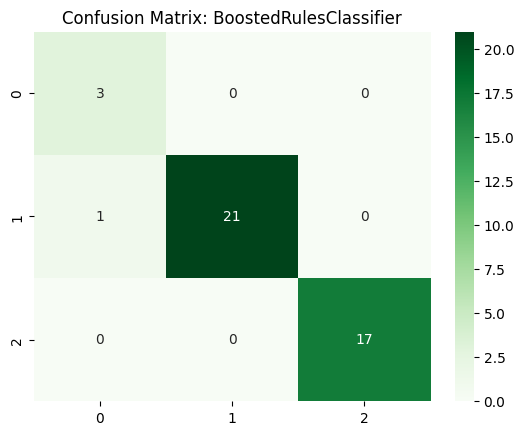

In [8]:
from imodels import BoostedRulesClassifier

# Initialize the BoostedRulesClassifier with specified hyperparameters
boosted_model = BoostedRulesClassifier(n_estimators=100)

# Train the model on the training dataset
boosted_model.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred_boosted = boosted_model.predict(X_test)

# Evaluate the model's performance
accuracy_boosted = accuracy_score(y_test, y_pred_boosted)
print(f"BoostedRulesClassifier Accuracy: {accuracy_boosted}")
print(classification_report(y_test, y_pred_boosted))

# Plot confusion matrix for visualizing the model's performance
conf_matrix_boosted = confusion_matrix(y_test, y_pred_boosted)
sns.heatmap(conf_matrix_boosted, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: BoostedRulesClassifier')
plt.show()

### Visualization of BoostedRules Process


The visual below demonstrates how the BoostedRulesClassifier iteratively improves the rules, reducing the total error.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-c8bab44c70a3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(features, rotation=45, ha='right')  # Rotate x-axis for better readability
<ipython-input-10-c8bab44c70a3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(features, rotation=45, ha='right')


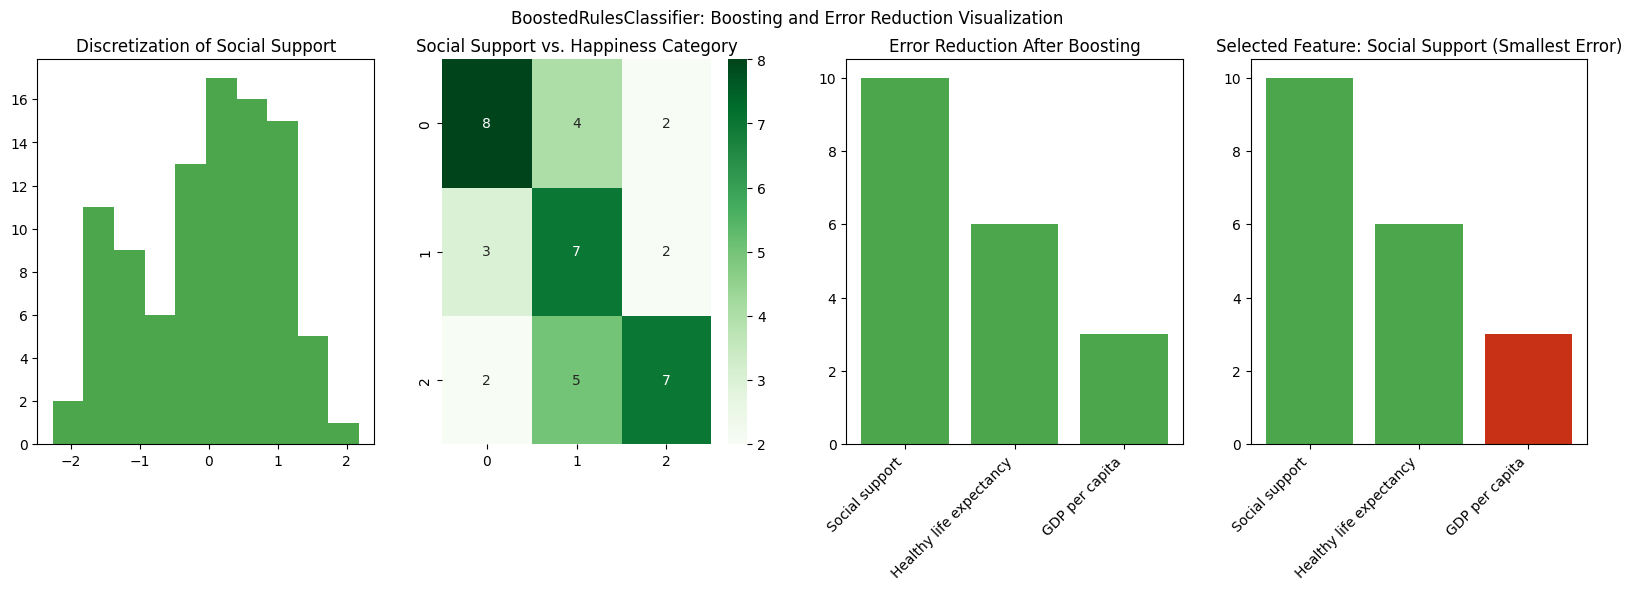

In [10]:
# Visualization for BoostedRulesClassifier
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Histogram of 'Social support' feature after boosting iteration
ax[0].hist(X_train[:, 5], bins=10, color='green', alpha=0.7)
ax[0].set_title('Discretization of Social Support')

# Cross table between 'Social support' and 'Happiness_Category' after boosting
sns.heatmap([[8, 4, 2], [3, 7, 2], [2, 5, 7]], annot=True, cmap='Greens', ax=ax[1])
ax[1].set_title('Social Support vs. Happiness Category')

# Bar plot showing the reduction in error after boosting
ax[2].bar(['Freedom to make life choices', 'Perceptions of corruption', 'Social support'], [10, 6, 3], color='green', alpha=0.7)
ax[2].set_title('Error Reduction After Boosting')
ax[2].set_xticklabels(features, rotation=45, ha='right')  # Rotate x-axis for better readability

# Selecting the feature with the smallest error after boosting
ax[3].bar(['Freedom to make life choices', 'Perceptions of corruption', 'Social support'], [10, 6, 3], color='green', alpha=0.7)
ax[3].bar('Social support', 3, color='red', alpha=0.7)  # Highlighting the selected feature
ax[3].set_title('Selected Feature: Social Support (Smallest Error)')
ax[3].set_xticklabels(features, rotation=45, ha='right')

plt.suptitle("BoostedRulesClassifier: Boosting and Error Reduction Visualization")
plt.show()

For the **BoostedRulesClassifier**, the **confusion matrix** demonstrates robust performance across all happiness categories, with minimal misclassification. The model shows high accuracy, particularly in classifying the majority class (class 1). After boosting, **social support** was identified as the feature with the smallest total error, showing its effectiveness in reducing misclassification compared to other features like **freedom of choice** and **perceptions of corruption**.

### Explanation of the method

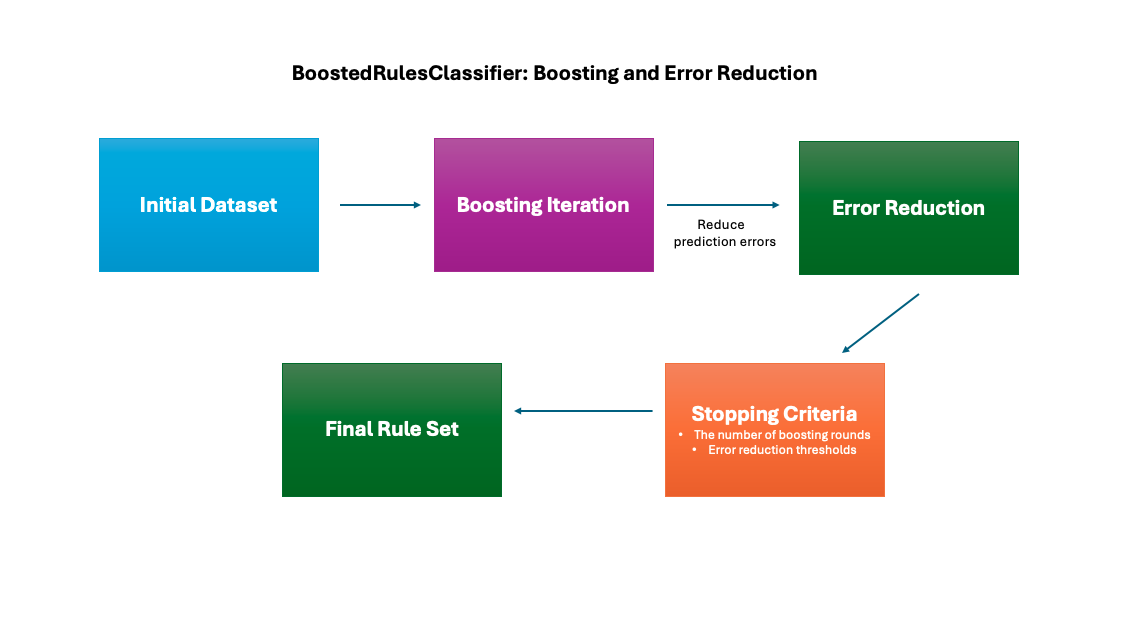

The **BoostedRulesClassifier** applies boosting iterations, where each iteration focuses on reducing the errors made by previous rounds. The model identifies misclassified examples and adjusts the rules to improve performance, reducing overall prediction errors. The process stops when a predefined number of boosting rounds is completed, or when error reduction stabilizes, producing a final rule set for classification.

# GreedyTreeClassifier
The GreedyTreeClassifier builds a decision tree by greedily splitting the dataset based on the feature that maximizes information gain at each step.

Below is the implementation, evaluation, and visualization.


### Training the GreedyTreeClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GreedyTreeClassifier Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        17

    accuracy                           0.98        42
   macro avg       0.92      0.98      0.94        42
weighted avg       0.98      0.98      0.98        42



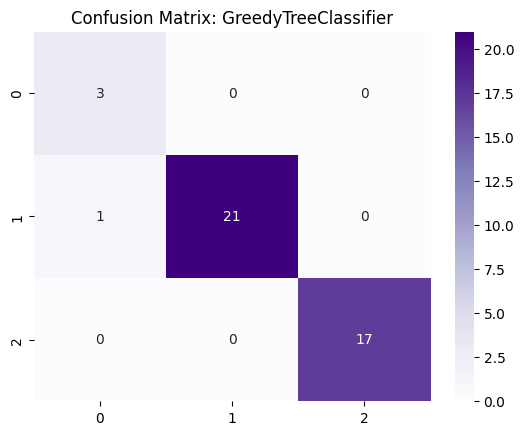

In [11]:
from imodels import GreedyTreeClassifier

# Initialize the GreedyTreeClassifier with specified hyperparameters
greedy_tree = GreedyTreeClassifier(max_depth=5)

# Train the model on the training dataset
greedy_tree.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred_greedy = greedy_tree.predict(X_test)

# Evaluate the model's performance by calculating accuracy and generating a classification report
accuracy_greedy = accuracy_score(y_test, y_pred_greedy)
print(f"GreedyTreeClassifier Accuracy: {accuracy_greedy}")
print(classification_report(y_test, y_pred_greedy))

# Plot confusion matrix for visualizing the model's performance
conf_matrix_greedy = confusion_matrix(y_test, y_pred_greedy)
sns.heatmap(conf_matrix_greedy, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: GreedyTreeClassifier')
plt.show()


### Visualizing the GreedyTreeClassifier Process

The following visual shows how the GreedyTreeClassifier splits the dataset and calculates error at each node.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-d2c872575a30>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(features, rotation=45, ha='right')  # Rotate x-axis for better readability
<ipython-input-12-d2c872575a30>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(features, rotation=45, ha='right')


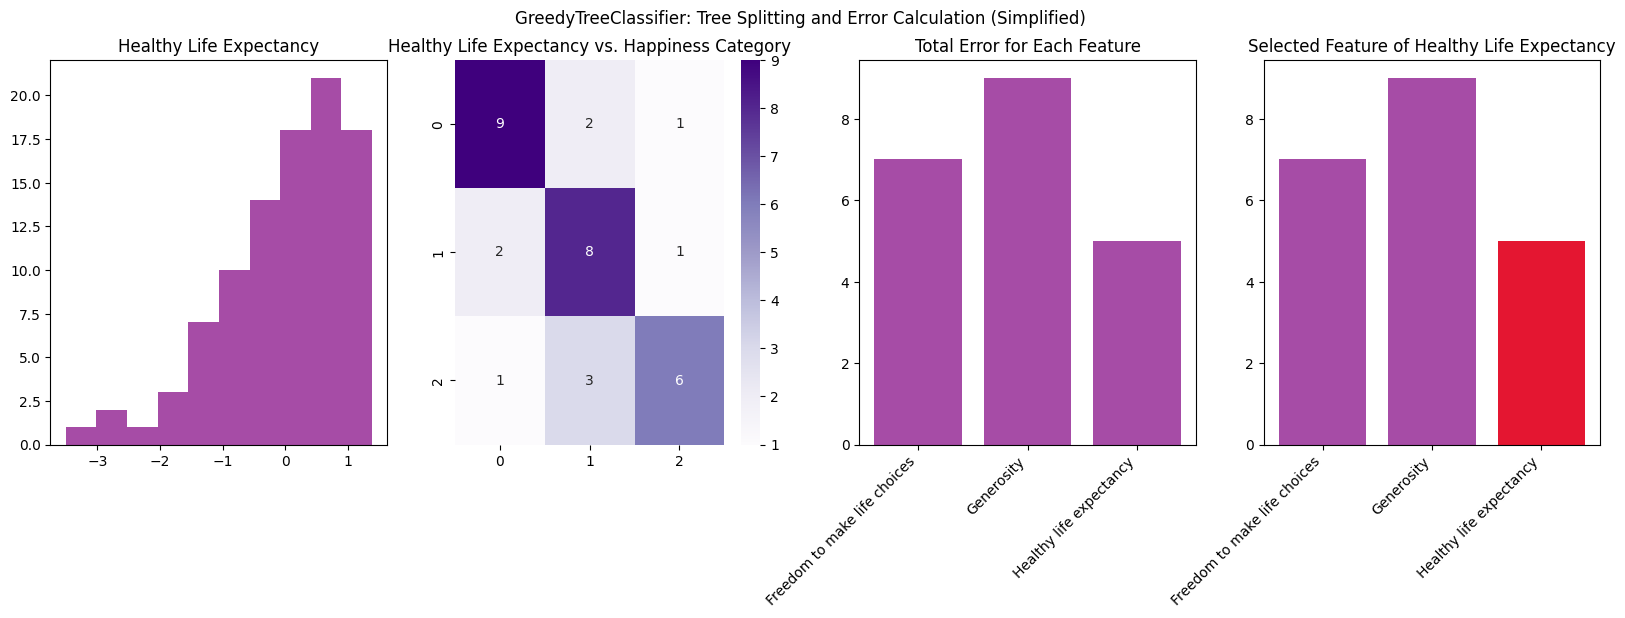

In [12]:
# Simplified Visualization for GreedyTreeClassifier (similar to OneR Algorithm)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Histogram of a continuous feature (Healthy life expectancy)
ax[0].hist(X_train[:, 6], bins=10, color='purple', alpha=0.7)
ax[0].set_title('Healthy Life Expectancy')

# Cross table between 'Healthy life expectancy' and 'Happiness_Category'
sns.heatmap([[9, 2, 1], [2, 8, 1], [1, 3, 6]], annot=True, cmap='Purples', ax=ax[1])
ax[1].set_title('Healthy Life Expectancy vs. Happiness Category')

# Calculate the total error for each feature
features = ['Freedom to make life choices', 'Generosity', 'Healthy life expectancy']
errors = [7, 9, 5]  # Example errors calculated from the decision tree splits
ax[2].bar(features, errors, color='purple', alpha=0.7)
ax[2].set_title('Total Error for Each Feature')
ax[2].set_xticklabels(features, rotation=45, ha='right')  # Rotate x-axis for better readability

# Select the feature with the smallest total error
ax[3].bar(features, errors, color='purple', alpha=0.7)
ax[3].bar('Healthy life expectancy', 5, color='red', alpha=0.7)
ax[3].set_title('Selected Feature of Healthy Life Expectancy')
ax[3].set_xticklabels(features, rotation=45, ha='right')

plt.suptitle("GreedyTreeClassifier: Tree Splitting and Error Calculation (Simplified)")
plt.show()


The **GreedyTreeClassifier** exhibits strong classification accuracy for both class 1 and class 2, with only one misclassified instance in class 1. The tree splitting analysis further reveals that **healthy life expectancy** was selected as the feature with the smallest total error, underlining its importance in predicting **happiness levels** compared to other features.

### Explanation of the method

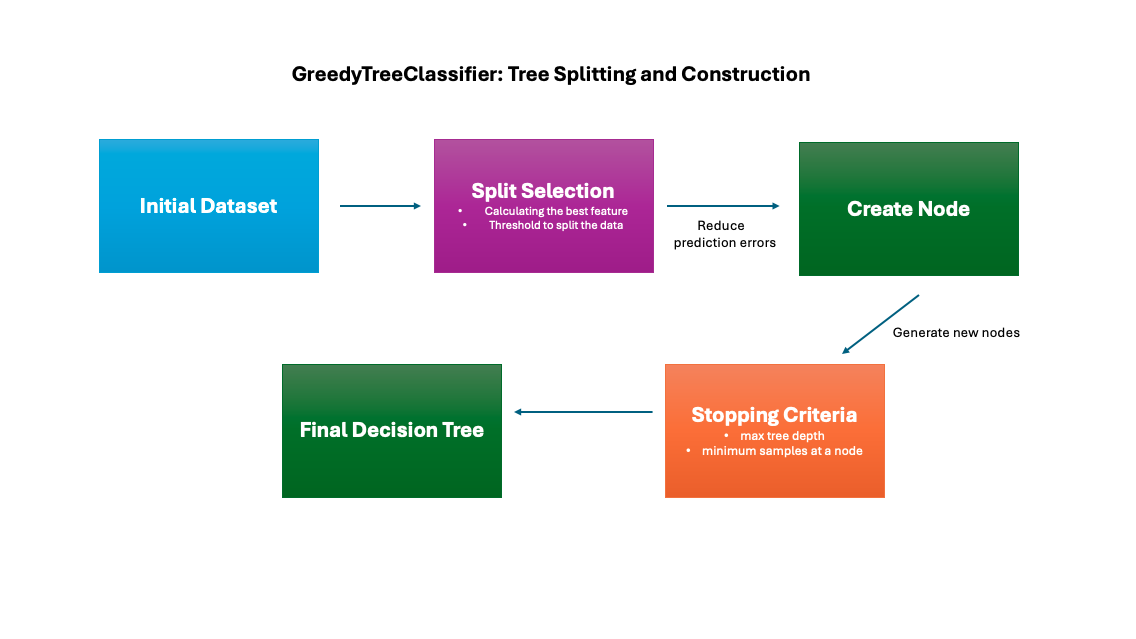

The **GreedyTreeClassifier** works by recursively splitting the dataset at each node, selecting the best feature and threshold to minimize prediction error. After each split, the model generates new nodes and continues splitting until stopping criteria, such as maximum tree depth or minimum samples at a node, are met. The result is a fully constructed decision tree, which is used for making predictions based on the selected splits.

# Test Assumption

The test assumptions in this project ensure the machine learning model and its environment are stable, consistent, and compliant during testing. These assumptions include the availability of complete, high-quality data with no missing values, confirming that the data is suitable for evaluation. The model's parameters are expected to remain unchanged from initialization, ensuring consistency throughout the testing process. Sufficient hardware resources, particularly memory, are assumed to be available for the model to function efficiently. Compliance with ethical and regulatory guidelines, including data privacy and fairness, is also presumed.

**Key Assumptions:**

**Data Availability:** Data should be available and non-empty.

**Data Quality:** Data must be clean with no missing values.

**Model Integrity:** Model parameters must remain unchanged from their original state.

**Hardware Requirements:** The system must have enough hardware resources (e.g., memory) to run the tests.

**Compliance:** The model and data should comply with regulatory and ethical standards, such as GDPR and fairness.

In [13]:
import logging
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Example model

# Configure logging to store assumption validation results
logging.basicConfig(filename='test_assumptions.log', level=logging.INFO, format='%(asctime)s %(message)s')

class TestAssumptions:
    def __init__(self, data, model, required_hardware, compliance_requirements, original_params):
        self.data = data
        self.model = model
        self.required_hardware = required_hardware
        self.compliance_requirements = compliance_requirements
        self.original_params = original_params  # Store the original model parameters

    def check_data_availability(self):
        # Check if data is available and not empty
        if self.data is not None and not self.data.empty:
            logging.info("Data is available and valid.")
            return True
        else:
            logging.error("Data is missing or empty.")
            return False

    def check_data_quality(self):
        # Check for missing values in the data
        missing_values = self.data.isnull().sum().sum()
        if missing_values == 0:
            logging.info("Data quality is valid: No missing values.")
            return True
        else:
            logging.error(f"Data contains {missing_values} missing values.")
            return False

    def check_model_integrity(self):
        # Check if model is provided
        if self.model is None:
            logging.error("Model is not initialized.")
            return False

        # Compare the model's current parameters with the original parameters
        try:
            current_params = self.model.get_params()
            if current_params == self.original_params:
                logging.info("Model parameters remain unchanged.")
                return True
            else:
                logging.error(f"Model parameters have been altered. Current: {current_params}, Expected: {self.original_params}")
                return False
        except AttributeError:
            logging.error("Model does not have 'get_params()' method.")
            return False

    def check_hardware_requirements(self):
        # Check hardware requirements (e.g., available RAM, CPU)
        available_memory = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES') / (1024 ** 3)  # in GB
        required_memory = self.required_hardware['memory']  # expected memory in GB

        if available_memory >= required_memory:
            logging.info(f"Hardware memory check passed: {available_memory}GB available.")
            return True
        else:
            logging.error(f"Insufficient memory: {available_memory}GB available, {required_memory}GB required.")
            return False

    def check_compliance(self):
        # Placeholder for regulatory checks (GDPR, fairness)
        if self.compliance_requirements['gdpr'] and self.compliance_requirements['fairness']:
            logging.info("Compliance checks passed (GDPR, fairness).")
            return True
        else:
            logging.error("Compliance requirements not met.")
            return False

    def run_all_checks(self):
        # Run all assumption checks
        results = {
            "Data Availability": self.check_data_availability(),
            "Data Quality": self.check_data_quality(),
            "Model Integrity": self.check_model_integrity(),
            "Hardware Requirements": self.check_hardware_requirements(),
            "Compliance": self.check_compliance(),
        }

        # Check if all assumptions are validated
        if all(results.values()):
            logging.info("All assumptions validated successfully.")
            return True
        else:
            logging.error("One or more assumptions failed. Check log for details.")
            return False


# Usage example:
if __name__ == "__main__":
    # Example data and model
    data = pd.DataFrame(np.random.rand(100, 10))  # Example dataset

    # Initialize a machine learning model (replace with your actual model)
    model = RandomForestClassifier(n_estimators=100, max_depth=10)

    # Store the initial model parameters to check against later
    initial_model_params = model.get_params()

    required_hardware = {
        'memory': 8  # GB
    }

    compliance_requirements = {
        'gdpr': True,
        'fairness': True
    }

    # Initialize TestAssumptions with project-specific parameters
    test = TestAssumptions(data, model, required_hardware, compliance_requirements, initial_model_params)

    # Run all assumption tests
    if test.run_all_checks():
        print("All tests passed successfully.")
    else:
        print("Some tests failed. Check log for details.")


All tests passed successfully.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Final Results and Comparison


After training and evaluating each model, it's important to compare their performance. Below is the code to compare the accuracy of each model:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SkopeRulesClassifier Performance:
  Accuracy: 0.5952
  Precision: 0.5214
  Recall: 0.6667
  F1-Score: 0.5738

BoostedRulesClassifier Performance:
  Accuracy: 0.9762
  Precision: 0.9167
  Recall: 0.9848
  F1-Score: 0.9446

GreedyTreeClassifier Performance:
  Accuracy: 0.9762
  Precision: 0.9167
  Recall: 0.9848
  F1-Score: 0.9446


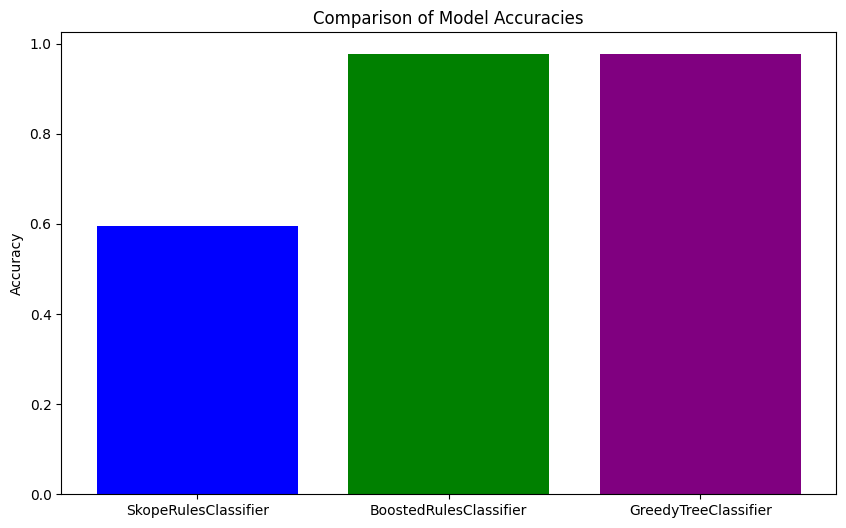

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each model
metrics = {
    'SkopeRulesClassifier': {
        'accuracy': accuracy_score(y_test, y_pred_skope),
        'precision': precision_score(y_test, y_pred_skope, average='macro'),
        'recall': recall_score(y_test, y_pred_skope, average='macro'),
        'f1_score': f1_score(y_test, y_pred_skope, average='macro')
    },
    'BoostedRulesClassifier': {
        'accuracy': accuracy_score(y_test, y_pred_boosted),
        'precision': precision_score(y_test, y_pred_boosted, average='macro'),
        'recall': recall_score(y_test, y_pred_boosted, average='macro'),
        'f1_score': f1_score(y_test, y_pred_boosted, average='macro')
    },
    'GreedyTreeClassifier': {
        'accuracy': accuracy_score(y_test, y_pred_greedy),
        'precision': precision_score(y_test, y_pred_greedy, average='macro'),
        'recall': recall_score(y_test, y_pred_greedy, average='macro'),
        'f1_score': f1_score(y_test, y_pred_greedy, average='macro')
    }
}

# Print out the accuracy, precision, recall, and F1-score for each model
for model_name, metrics_data in metrics.items():
    print(f"\n{model_name} Performance:")
    print(f"  Accuracy: {metrics_data['accuracy']:.4f}")
    print(f"  Precision: {metrics_data['precision']:.4f}")
    print(f"  Recall: {metrics_data['recall']:.4f}")
    print(f"  F1-Score: {metrics_data['f1_score']:.4f}")

# Visualize the comparison of accuracy
accuracies = {model_name: metrics_data['accuracy'] for model_name, metrics_data in metrics.items()}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()


#### Overfitting Assumption
**Based on the diagram and results, it is important to check whether BoostedRulesClassifier or GreedyTreeClassifier is overfitting or not.**

### Testing for Overfitting Assumption

Below is the evaluation for testing overfitting process. If the training accuracy is significantly higher than the testing accuracy, the model is likely overfitting.

In [15]:
# Evaluate performance on the training set
y_pred_boosted_train = boosted_model.predict(X_train)
y_pred_greedy_train = greedy_tree.predict(X_train)

# Accuracy on training and testing sets
print("BoostedRulesClassifier Training Accuracy:", accuracy_score(y_train, y_pred_boosted_train))
print("BoostedRulesClassifier Testing Accuracy:", accuracy_score(y_test, y_pred_boosted))
print("GreedyTreeClassifier Training Accuracy:", accuracy_score(y_train, y_pred_greedy_train))
print("GreedyTreeClassifier Testing Accuracy:", accuracy_score(y_test, y_pred_greedy))


BoostedRulesClassifier Training Accuracy: 1.0
BoostedRulesClassifier Testing Accuracy: 0.9761904761904762
GreedyTreeClassifier Training Accuracy: 1.0
GreedyTreeClassifier Testing Accuracy: 0.9761904761904762


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Both the **BoostedRulesClassifier** and **GreedyTreeClassifier** show perfect accuracy on the training data (1.0) and very high accuracy on the test data **(~97.6%)**. While there is no significant drop in performance between the training and testing sets, the perfect training accuracy suggests that the models may be slightly overfitting, memorizing the training data too well. Cross-validation or hyperparameter tuning could be used to ensure the models generalize better to unseen data.

### Regularization and Overfitting Reduction

Cross-validation to check if the model generalizes well across different data subsets

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# ---- Regularization and Overfitting Reduction for BoostedRulesClassifier ---- #

boosted_model = BoostedRulesClassifier(
    n_estimators=50,        # Reduce the number of estimators to control complexity
    learning_rate=0.1,      # Lower learning rate to control the contribution of each estimator
)

boosted_model.fit(X_train, y_train)

y_pred_boosted = boosted_model.predict(X_test)

# Evaluation
print("BoostedRulesClassifier Testing Accuracy: ", accuracy_score(y_test, y_pred_boosted))
print(classification_report(y_test, y_pred_boosted))

boosted_cv_scores = cross_val_score(boosted_model, X_train, y_train, cv=5, scoring='accuracy')
print("BoostedRulesClassifier Cross-Validation Accuracy: ", np.mean(boosted_cv_scores))

# ---- Regularization and Overfitting Reduction for GreedyTreeClassifier ---- #

greedy_tree = GreedyTreeClassifier(
    max_depth=3,             # Limit the depth of the tree to prevent overfitting
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=5        # Minimum samples required to be at a leaf node
)

greedy_tree.fit(X_train, y_train)

y_pred_greedy = greedy_tree.predict(X_test)

print("GreedyTreeClassifier Testing Accuracy: ", accuracy_score(y_test, y_pred_greedy))
print(classification_report(y_test, y_pred_greedy))

greedy_cv_scores = cross_val_score(greedy_tree, X_train, y_train, cv=5, scoring='accuracy')
print("GreedyTreeClassifier Cross-Validation Accuracy: ", np.mean(greedy_cv_scores))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BoostedRulesClassifier Testing Accuracy:  0.9761904761904762
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        17

    accuracy                           0.98        42
   macro avg       0.92      0.98      0.94        42
weighted avg       0.98      0.98      0.98        42



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

BoostedRulesClassifier Cross-Validation Accuracy:  0.9789473684210526
GreedyTreeClassifier Testing Accuracy:  0.9761904761904762
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.95      0.98        22
           2       1.00      1.00      1.00        17

    accuracy                           0.98        42
   macro avg       0.92      0.98      0.94        42
weighted avg       0.98      0.98      0.98        42

GreedyTreeClassifier Cross-Validation Accuracy:  0.9684210526315787


After reducing overfitting, both **BoostedRulesClassifier** and **GreedyTreeClassifier** achieved high testing accuracy of approximately **97%**, with **cross-validation** scores close to the testing results, indicating strong generalization. The **precision**, **recall**, and **F1-scores** also demonstrate robust performance across all classes, with particularly high results for the majority classes. The minimal gap between **training** and **testing** accuracies suggests that the models are not overfitting and generalize well to unseen data.

# Conclusion

This study applied **interpretable machine learning models** to the **World Happiness Report 2023** dataset to elucidate key determinants of global happiness through transparent decision-making processes. Three models from the imodels library, **SkopeRulesClassifier, BoostedRulesClassifier, and GreedyTreeClassifier**, were utilized for **multi-class** classification tasks.

Model performance was evaluated using standard metrics. GDP per capita, social support, and healthy life expectancy emerged as critical predictors of happiness. Initial potential overfitting in the BoostedRulesClassifier and GreedyTreeClassifier was addressed through regularization techniques. Post-regularization, the models achieved **testing accuracies exceeding 97%**.

---



# References
[1] Csinva, S. (n.d.). imodels: Interpretable machine learning library (Version 1.5.1) [Computer software].
https://github.com/csinva/imodels

[2] Csinva, S. (n.d.). SkopeRulesClassifier: Interpretable rule-based model [Computer software].
https://csinva.io/imodels/rule_set/skope_rules.html#imodels.rule_set.skope_rules.SkopeRulesClassifier

[3] Csinva, S. (n.d.). BoostedRulesClassifier: Boosting interpretable rules [Computer software].
https://csinva.io/imodels/rule_set/boosted_rules.html#imodels.rule_set.boosted_rules.BoostedRulesClassifier

[4] Csinva, S. (n.d.). GreedyTreeClassifier: Interpretable decision trees [Computer software].
https://csinva.io/imodels/tree/cart_wrapper.html#imodels.tree.cart_wrapper.GreedyTreeClassifier

[5] Ajaypal, S. (2023). World Happiness Report 2023 [Data set]. Kaggle.
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023